### Import libraries

In [1]:
import pathlib
import pandas as pd
import numpy as np

import sys
sys.path.append("../utils")
from load_utils import compile_mitocheck_batch_data, split_data
from analysis_utils import get_2D_umap_embeddings, show_2D_umap

### Compile control data

In [2]:
# get 10% of negative control features
negative_control_data_path = pathlib.Path("../1.idr_streams/extracted_features/negative_control_data")
negative_control_data = compile_mitocheck_batch_data(negative_control_data_path)
negative_control_data = negative_control_data.sample(frac=0.1, random_state=0)

# get 10% of positive control features
positive_control_data_path = pathlib.Path("../1.idr_streams/extracted_features/positive_control_data")
positive_control_data = compile_mitocheck_batch_data(positive_control_data_path)
positive_control_data = positive_control_data.sample(frac=0.1, random_state=0)

# combine negative and positive control features
control_data = pd.concat([negative_control_data, positive_control_data])
# shuffle data so negative/positive controls are not ordered
control_data = control_data.sample(frac=1, random_state=0)
control_data

Location_Center_X  Location_Center_Y Metadata_Plate Metadata_Well  \
238440         322.210526         781.438596      LT0140_05            49   
153585         453.440476         726.345238      LT0016_15            52   
72303          705.317073         333.146341      LT0090_46            52   
239129         612.862069         945.827586      LT0140_05           336   
584237         261.747475         775.272727      LT0102_01            52   
...                   ...                ...            ...           ...   
567616         871.561644         555.397260      LT0073_02            26   
512241         960.516129         750.419355      LT0020_03             4   
50524         1077.840000         713.880000      LT0138_03            49   
128977        1025.069444         753.902778      LT0077_24            49   
219259         704.934211         695.513158      LT0104_31            15   

       Metadata_Frame  Metadata_Site Metadata_Plate_Map_Name  \
238440             42              1            LT0140_05_49   
153585             51              1            LT0016_15_52   
72303              45              1            LT0090_46_52   
239129             58              1           LT0140_05_336   
584237             33              1            LT0102_01_52   
...               ...            ...                     ...   
567616             46              1            LT0073_02_26   
512241             33              1             LT0020_03_4   
50524              52              1            LT0138_03_49   
128977             50              1            LT0077_24_49   
219259             60              1            LT0104_31_15   

                          Metadata_DNA     Metadata_Gene  \
238440   LT0140_05/LT0140_05_49_42.tif   ENSG00000149503   
153585   LT0016_15/LT0016_15_52_51.tif   ENSG00000149503   
72303    LT0090_46/LT0090_46_52_45.tif   ENSG00000149503   
239129  LT0140_05/LT0140_05_336_58.tif              COPB   
584237   LT0102_01/LT0102_01_52_33.tif   ENSG00000149503   
...                                ...               ...   
567616   LT0073_02/LT0073_02_26_46.tif  negative control   
512241    LT0020_03/LT0020_03_4_33.tif   ENSG00000149503   
50524    LT0138_03/LT0138_03_49_52.tif   ENSG00000149503   
128977   LT0077_24/LT0077_24_49_50.tif   ENSG00000149503   
219259   LT0104_31/LT0104_31_15_60.tif  negative control   

        Metadata_Gene_Replicate  ... efficientnet_1270  efficientnet_1271  \
238440                        1  ...         -0.032601          -0.152391   
153585                        1  ...         -0.109159          -0.130944   
72303                         1  ...         -0.054680          -0.081134   
239129                        1  ...         -0.064703          -0.160818   
584237                        1  ...         -0.042212          -0.161596   
...                         ...  ...               ...                ...   
567616                        1  ...         -0.088427          -0.120199   
512241                        1  ...         -0.113765          -0.179166   
50524                         1  ...         -0.081424          -0.213928   
128977                        1  ...         -0.171650          -0.145269   
219259                        1  ...         -0.113197          -0.126969   

        efficientnet_1272  efficientnet_1273  efficientnet_1274  \
238440          -0.244236           0.004220          -0.207780   
153585          -0.191691           0.398155          -0.171838   
72303           -0.193103          -0.146588          -0.228091   
239129          -0.054122          -0.140738          -0.096258   
584237          -0.225040           0.181339          -0.188578   
...                   ...                ...                ...   
567616          -0.171771           0.307227          -0.218594   
512241          -0.132976          -0.025743          -0.183526   
50524           -0.185378           0.078616          -0.211742  

### Create 2D umaps colored by metadata

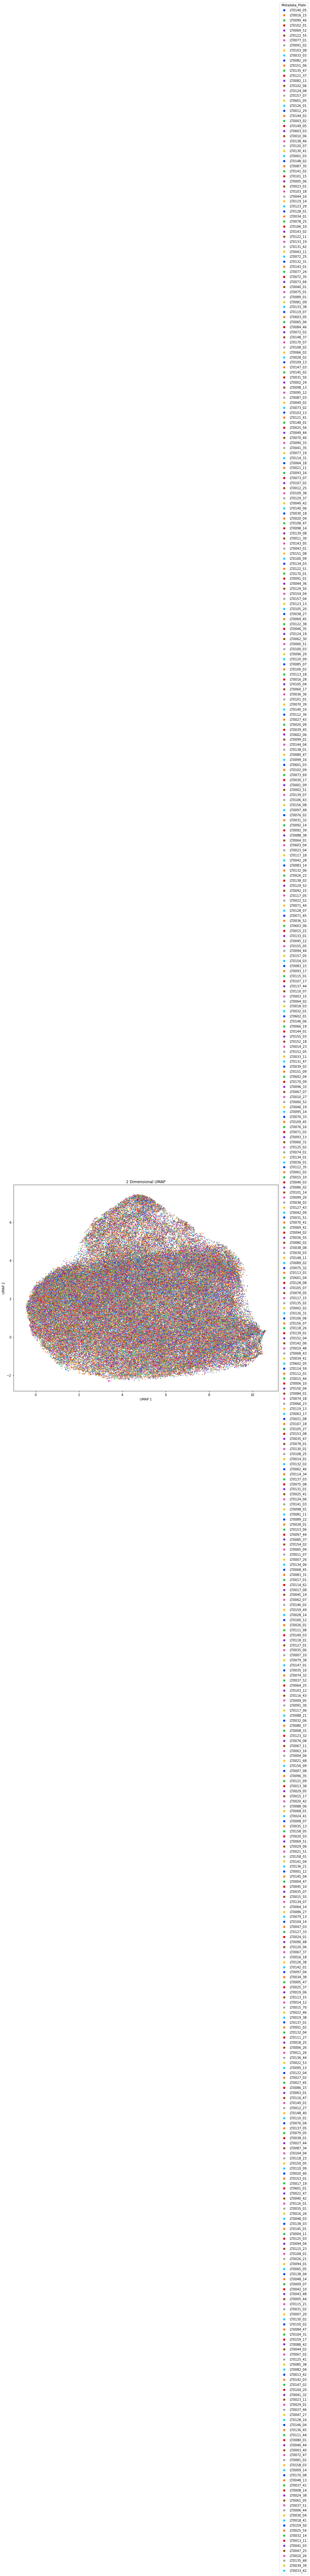

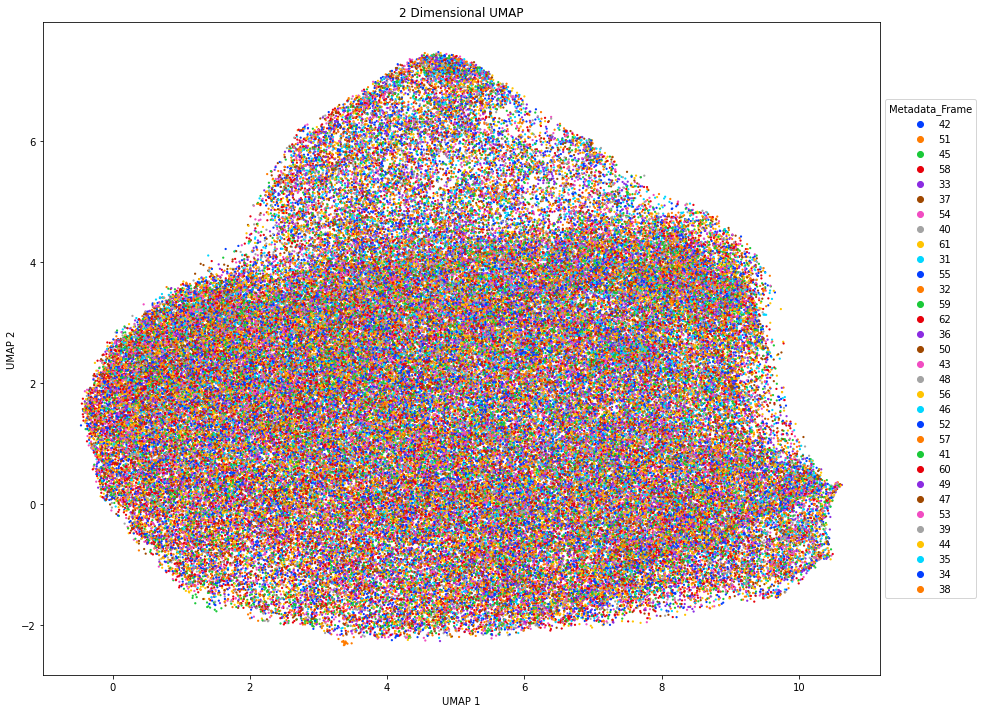

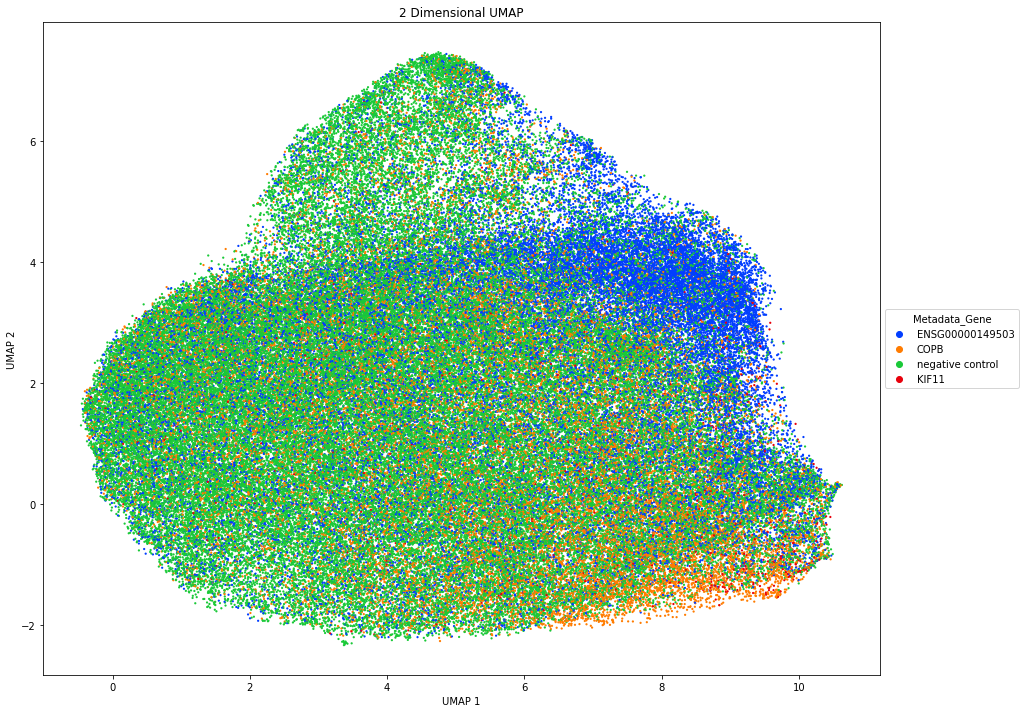

In [3]:
results_dir = pathlib.Path("raw_data_umaps/")
results_dir.mkdir(parents=True, exist_ok=True)

metadata_dataframe, feature_data = split_data(control_data)
x_data, y_data = get_2D_umap_embeddings(feature_data)

metadata_fields = ["Metadata_Plate", "Metadata_Well", "Metadata_Frame", "Metadata_Gene"]

for metadata_field in metadata_fields:
    metadata = metadata_dataframe[metadata_field]
    show_2D_umap(x_data, y_data, metadata, f"{results_dir}/controls_{metadata_field}.png")